In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import matplotlib.dates as matDates

In [2]:
#Loading Confirmed Cases
confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,47219
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,104750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333746,333746,333746,333746,333746,333746,333746


In [3]:
#Loading Death Cases
deaths_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
deaths_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,7835
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,157
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


In [4]:

#Drop Lat and Long Columns as part of data cleaning
confirmed_cases.drop(columns=['Lat','Long'],inplace=True)
deaths_cases.drop(columns=['Lat','Long'],inplace=True)

In [5]:
confirmed_cases

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273
1,NaN,Albania,0,0,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,47219
4,NaN,Angola,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,104750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,0,0,0,0,0,0,0,0,...,333721,333721,333721,333746,333746,333746,333746,333746,333746,333746


In [6]:
deaths_cases

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,7835
1,NaN,Albania,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,157
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,0,0,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


In [7]:
#Finding out Total Confirmed Cases by Country
confirmed_cases['Total Confirmed Cases'] = confirmed_cases.iloc[:,4:].sum(axis=1)

confirmed_cases

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,Total Confirmed Cases
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,205612,205802,205830,205907,206073,206133,206145,206206,206273,110421190
1,NaN,Albania,0,0,0,0,0,0,0,0,...,333330,333330,333338,333343,333360,333381,333391,333408,333413,154163521
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,271061,271079,271082,271090,271096,271100,271102,271107,271113,157237915
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,46824,46824,46824,47219,47219,47219,47219,47219,47219,20057421
4,NaN,Angola,0,0,0,0,0,0,0,0,...,104491,104491,104491,104676,104676,104676,104676,104676,104750,50145291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,346441416
285,NaN,Winter Olympics 2022,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,164172
286,NaN,Yemen,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,6756605
287,NaN,Zambia,0,0,0,0,0,0,0,0,...,333721,333721,333746,333746,333746,333746,333746,333746,333746,164137486


In [8]:
#Finding out total death cases by country
deaths_cases['Total Death Cases'] = deaths_cases.iloc[:,4:].sum(axis=1)
deaths_cases

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,Total Death Cases
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7834,7834,7834,7834,7835,4681699
1,NaN,Albania,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,2147369
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,4254461
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,156,156,156,157,157,157,157,157,157,111779
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1923,1923,1923,1924,1924,1924,1924,1924,1925,1050413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,3218157
285,NaN,Winter Olympics 2022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,1312500
287,NaN,Zambia,0,0,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,2252161


In [9]:
#Merging both Confirmed cases and death cases dataframe on global level
confirmed = confirmed_cases[["Province/State","Country/Region","Total Confirmed Cases"]]

death = deaths_cases[["Province/State","Country/Region","Total Death Cases"]]

dataFrame_finals=pd.merge(confirmed,death,on=["Province/State","Country/Region"])
dataFrame_finals

,Province/State,Country/Region,Total Confirmed Cases,Total Death Cases
0,NaN,Afghanistan,110421190,4681699
1,NaN,Albania,154163521,2147369
2,NaN,Algeria,157237915,4254461
3,NaN,Andorra,20057421,111779
4,NaN,Angola,50145291,1050413
...,...,...,...,...
284,NaN,West Bank and Gaza,346441416,3218157
285,NaN,Winter Olympics 2022,164172,0
286,NaN,Yemen,6756605,1312500
287,NaN,Zambia,164137486,2252161


In [10]:
#Get Alpha Vantage API key and fetch stocks based on overall American market, Canadian market,travel sector, real estate sector and precious metal stock
api_key = 'PXHS3RJFNLTJIOF4'
ts = TimeSeries(key=api_key,output_format='pandas')
overall_us = ts.get_weekly_adjusted('NASDX')
overall_canada = ts.get_weekly_adjusted('SHOP.TRT')
travel_stock = ts.get_weekly_adjusted('ABNB') #Airbnb
real_estate = ts.get_weekly_adjusted('FOR') #Forestar Grp Inc
precious_metals = ts.get_weekly_adjusted('GOLD') #Barrick gOLD

In [11]:
#Create dataframes for American market, Canadian market,travel sector, real estate sector and precious metal stock
america_dataFrame = pd.DataFrame(overall_us[0].reset_index(level=0))
canada_dataFrame = pd.DataFrame(overall_canada[0].reset_index(level=0))
travel_dataFrame = pd.DataFrame(travel_stock[0].reset_index(level=0))
real_estate_dataFrame = pd.DataFrame(real_estate[0].reset_index(level=0))
precious_metal_dataFrame = pd.DataFrame(precious_metals[0].reset_index(level=0))

In [12]:
america_dataFrame

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-02,25.75,26.01,25.57,25.90,25.9000,0.0,0.7655
1,2022-11-25,25.68,26.31,25.68,26.13,25.3819,0.0,0.0000
2,2022-11-18,26.00,26.37,25.95,25.95,25.2070,0.0,0.0000
3,2022-11-11,24.38,26.25,23.99,26.25,25.4984,0.0,0.0000
4,2022-11-04,25.33,25.33,23.74,24.12,23.4294,0.0,0.0000
...,...,...,...,...,...,...,...,...
1188,2000-02-25,10.30,11.06,10.30,10.85,8.4925,0.0,0.0000
1189,2000-02-18,10.40,10.70,10.30,10.30,8.0620,0.0,0.0000
1190,2000-02-11,10.34,10.66,10.34,10.39,8.1325,0.0,0.0000
1191,2000-02-04,9.38,10.14,9.38,10.14,7.9368,0.0,0.0000


In [13]:
canada_dataFrame

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-05,57.55,58.69,54.96,55.46,55.460,3373249.0,0.0
1,2022-12-02,52.34,60.63,49.92,57.96,57.960,31998200.0,0.0
2,2022-11-25,48.31,50.11,46.12,49.18,49.180,12602000.0,0.0
3,2022-11-18,51.84,55.49,48.38,49.02,49.020,22221200.0,0.0
4,2022-11-11,43.99,54.18,41.16,52.34,52.340,20307300.0,0.0
...,...,...,...,...,...,...,...,...
391,2015-06-26,44.69,47.49,40.60,41.20,4.120,1328000.0,0.0
392,2015-06-19,42.00,51.92,40.00,43.20,4.320,3960000.0,0.0
393,2015-06-12,33.98,41.50,33.01,41.45,4.145,1143000.0,0.0
394,2015-06-05,33.62,34.99,31.88,33.98,3.398,850000.0,0.0


In [14]:
travel_dataFrame

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-05,100.00,101.1700,98.04,98.51,98.51,3601549.0,0.0
1,2022-12-02,97.00,102.7600,94.81,101.00,101.00,26387210.0,0.0
2,2022-11-25,97.01,98.8299,92.98,97.67,97.67,17680050.0,0.0
3,2022-11-18,107.74,111.2350,96.60,97.77,97.77,25085032.0,0.0
4,2022-11-11,96.76,109.7700,93.28,109.57,109.57,34660330.0,0.0
...,...,...,...,...,...,...,...,...
99,2021-01-15,147.99,187.4200,143.61,169.27,169.27,41944591.0,0.0
100,2021-01-08,150.99,155.5400,137.00,149.77,149.77,25696460.0,0.0
101,2020-12-31,158.60,163.6400,143.12,146.80,146.80,17865721.0,0.0
102,2020-12-24,155.31,174.9700,145.11,154.84,154.84,37148599.0,0.0


In [15]:
real_estate_dataFrame

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-05,14.98,15.0900,14.78,15.05,15.05,135283.0,0.0
1,2022-12-02,14.55,15.1400,14.16,15.02,15.02,731913.0,0.0
2,2022-11-25,14.00,14.8000,13.80,14.71,14.71,339930.0,0.0
3,2022-11-18,13.73,14.1108,13.40,13.96,13.96,601847.0,0.0
4,2022-11-11,11.30,13.9600,11.24,13.82,13.82,589988.0,0.0
...,...,...,...,...,...,...,...,...
777,2008-01-18,18.80,21.1300,18.24,19.86,19.86,1104600.0,0.0
778,2008-01-11,21.70,21.8100,16.50,19.05,19.05,2041600.0,0.0
779,2008-01-04,21.95,23.9200,21.28,21.80,21.80,1917200.0,0.0
780,2007-12-28,24.45,24.4500,21.26,22.60,22.60,2608100.0,0.0


In [16]:
precious_metal_dataFrame

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-05,16.81,16.9092,16.4700,16.52,16.5200,21242900.0,0.0000
1,2022-12-02,16.05,17.3400,15.5000,16.98,16.9800,117219534.0,0.0500
2,2022-11-25,15.51,16.3000,15.1344,16.02,15.9697,52029706.0,0.0000
3,2022-11-18,16.33,16.4500,15.3500,15.62,15.5709,85474722.0,0.0000
4,2022-11-11,14.29,16.5800,14.1800,16.44,16.3884,123797348.0,0.0000
...,...,...,...,...,...,...,...,...
1200,1999-12-10,17.25,18.4400,17.1900,17.56,13.0970,6223500.0,0.0000
1201,1999-12-03,18.06,18.3100,17.3100,17.44,13.0075,8455600.0,0.0000
1202,1999-11-26,17.81,19.5600,17.5000,19.38,14.4544,9774400.0,0.1375
1203,1999-11-19,17.88,18.6300,17.5000,17.81,13.1895,7617200.0,0.0000


In [17]:
#Filtered date,high and low values from each stock and renamed specifically 
america_dataFrame = america_dataFrame[['date','2. high','3. low']].rename(columns={'2. high':'US_high','3. low':'US_low'})
canada_dataFrame = canada_dataFrame[['date','2. high','3. low']].rename(columns={'date':'date','2. high':'Canada_high','3. low':'Canada_low'})
travel_dataFrame = travel_dataFrame[['date','2. high','3. low']].rename(columns={"date":"date","2. high":"Travel_high","3. low":"Travel_low"})
real_estate_dataFrame = real_estate_dataFrame[['date','2. high','3. low']].rename(columns={"date":"date","2. high":"Real_estate_high","3. low":"Real_estate_low"})
precious_metal_dataFrame = precious_metal_dataFrame[['date','2. high','3. low']].rename(columns={"date":"date","2. high":"Precious_metal_high","3. low":"Precious_metal_low"})

In [18]:
america_dataFrame

,date,US_high,US_low
0,2022-12-02,26.01,25.57
1,2022-11-25,26.31,25.68
2,2022-11-18,26.37,25.95
3,2022-11-11,26.25,23.99
4,2022-11-04,25.33,23.74
...,...,...,...
1188,2000-02-25,11.06,10.30
1189,2000-02-18,10.70,10.30
1190,2000-02-11,10.66,10.34
1191,2000-02-04,10.14,9.38


In [19]:
canada_dataFrame

,date,Canada_high,Canada_low
0,2022-12-05,58.69,54.96
1,2022-12-02,60.63,49.92
2,2022-11-25,50.11,46.12
3,2022-11-18,55.49,48.38
4,2022-11-11,54.18,41.16
...,...,...,...
391,2015-06-26,47.49,40.60
392,2015-06-19,51.92,40.00
393,2015-06-12,41.50,33.01
394,2015-06-05,34.99,31.88


In [20]:
travel_dataFrame


,date,Travel_high,Travel_low
0,2022-12-05,101.1700,98.04
1,2022-12-02,102.7600,94.81
2,2022-11-25,98.8299,92.98
3,2022-11-18,111.2350,96.60
4,2022-11-11,109.7700,93.28
...,...,...,...
99,2021-01-15,187.4200,143.61
100,2021-01-08,155.5400,137.00
101,2020-12-31,163.6400,143.12
102,2020-12-24,174.9700,145.11


In [21]:
real_estate_dataFrame

,date,Real_estate_high,Real_estate_low
0,2022-12-05,15.0900,14.78
1,2022-12-02,15.1400,14.16
2,2022-11-25,14.8000,13.80
3,2022-11-18,14.1108,13.40
4,2022-11-11,13.9600,11.24
...,...,...,...
777,2008-01-18,21.1300,18.24
778,2008-01-11,21.8100,16.50
779,2008-01-04,23.9200,21.28
780,2007-12-28,24.4500,21.26


In [22]:
precious_metal_dataFrame

,date,Precious_metal_high,Precious_metal_low
0,2022-12-05,16.9092,16.4700
1,2022-12-02,17.3400,15.5000
2,2022-11-25,16.3000,15.1344
3,2022-11-18,16.4500,15.3500
4,2022-11-11,16.5800,14.1800
...,...,...,...
1200,1999-12-10,18.4400,17.1900
1201,1999-12-03,18.3100,17.3100
1202,1999-11-26,19.5600,17.5000
1203,1999-11-19,18.6300,17.5000


In [23]:
#Merged all stock market dataframes
dataFrame_stocks = america_dataFrame.merge(canada_dataFrame, on="date").merge(precious_metal_dataFrame, on="date").merge(real_estate_dataFrame,on="date").merge(travel_dataFrame,on="date")

In [24]:
dataFrame_Canada_Death = deaths_cases[deaths_cases['Country/Region'] == "Canada"].groupby("Country/Region").sum()
dataFrame_US_Death =deaths_cases[deaths_cases['Country/Region'] == "US"].groupby("Country/Region").sum()

dataFrame_Canada_Confirmed = confirmed_cases[confirmed_cases['Country/Region'] == "Canada"].groupby("Country/Region").sum()
dataFrame_US_Confirmed =confirmed_cases[confirmed_cases['Country/Region'] == "US"].groupby("Country/Region").sum()
dataFrame_US_Confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,Total Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,98573468,98633140,98697622,98807782,98924207,98962019,98967906,98972375,99023619,44248134329


In [25]:
df_Canada_Death = dataFrame_Canada_Death.reset_index().transpose().reset_index()

df_Canada_Death.columns = ["date","Canada_Death_Cases_Count"]
df_Canada_Death = df_Canada_Death.iloc[1:-1]

df_US_Death = dataFrame_US_Death.reset_index().transpose().reset_index()

df_US_Death.columns = ["date","US_Death_Cases_Count"]
df_US_Death = df_US_Death.iloc[1:-1]

df_Canada_Confirmed = dataFrame_Canada_Confirmed.reset_index().transpose().reset_index()

df_Canada_Confirmed.columns = ["date","Canada_Confirmed_Cases_Count"]
df_Canada_Confirmed = df_Canada_Confirmed.iloc[1:-1]

df_US_Confirmed = dataFrame_US_Confirmed.reset_index().transpose().reset_index()

df_US_Confirmed.columns = ["date","US_Confirmed_Cases_Count"]
df_US_Confirmed = df_US_Confirmed.iloc[1:-1]

In [26]:
df_deathcases_count = df_Canada_Death.merge(df_US_Death, on="date")
df_confirmcases_count = df_Canada_Confirmed.merge(df_US_Confirmed, on="date")

df_final = df_deathcases_count.merge(df_confirmcases_count, on = "date")

In [27]:
df_final['date'] = pd.to_datetime(df_final['date'])

df_final = df_final.merge(dataFrame_stocks, on='date',how='left')
print(df_final)

           date Canada_Death_Cases_Count US_Death_Cases_Count  \
0    2020-01-22                        0                    0   
1    2020-01-23                        0                    0   
2    2020-01-24                        0                    0   
3    2020-01-25                        0                    0   
4    2020-01-26                        0                    0   
...         ...                      ...                  ...   
1044 2022-12-01                    48133              1081147   
1045 2022-12-02                    48133              1081412   
1046 2022-12-03                    48133              1081431   
1047 2022-12-04                    48133              1081431   
1048 2022-12-05                    48133              1081638   

     Canada_Confirmed_Cases_Count US_Confirmed_Cases_Count  US_high  US_low  \
0                               0                        1      NaN     NaN   
1                               2                        1   

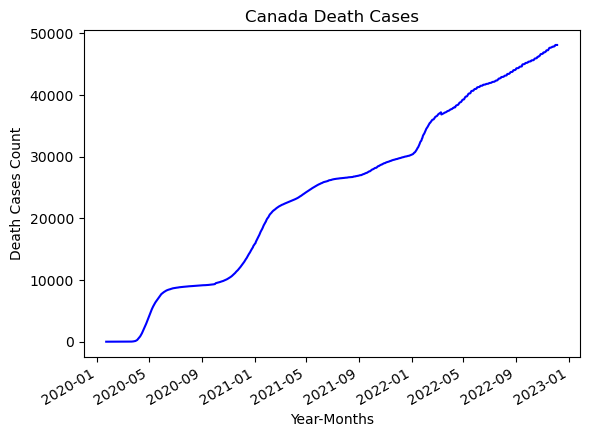

In [28]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['Canada_Death_Cases_Count'],'b-')
plt.title("Canada Death Cases")
plt.xlabel("Year-Months")
plt.ylabel("Death Cases Count")
fig.autofmt_xdate()
plt.show()

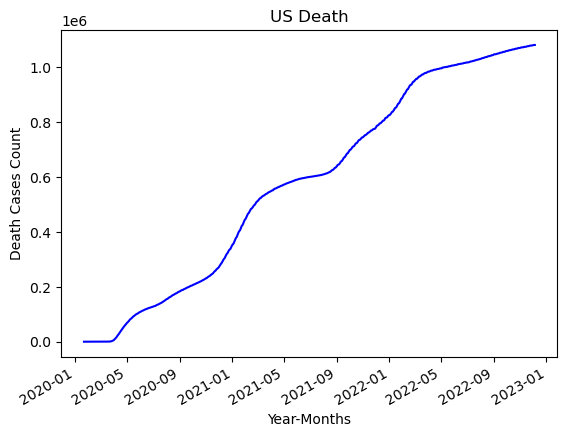

In [29]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['US_Death_Cases_Count'],'b-')

plt.title("US Death")
plt.xlabel("Year-Months")
plt.ylabel("Death Cases Count")

fig.autofmt_xdate()
plt.show()

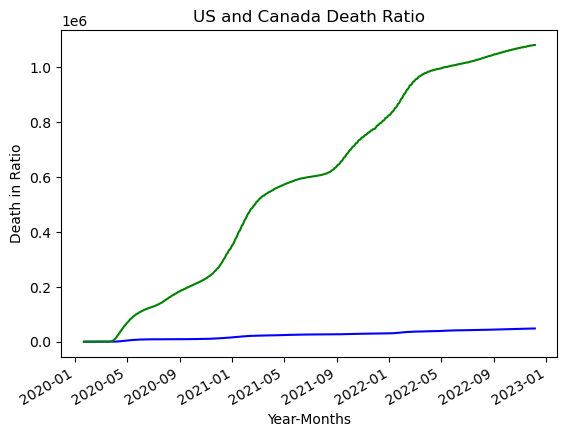

In [30]:

fig = plt.figure()
plt.plot_date(df_final['date'],df_final['Canada_Death_Cases_Count'],'b-')
plt.plot_date(df_final['date'],df_final['US_Death_Cases_Count'],'g-')

plt.title("US and Canada Death Ratio")
plt.xlabel("Year-Months")
plt.ylabel("Death in Ratio")

fig.autofmt_xdate()
plt.show()